# Lection7

## Deep Learning Classification



<img src="../img/02-fashion-mnist-learning.png" width=600px>

[Tensorflow documentation](https://www.tensorflow.org/api_docs/python/tf)

[Daniel Bourke video 1](https://www.youtube.com/watch?v=tpCFfeUEGs8&t=0s)

[Daniel Bourke video 2](https://www.youtube.com/watch?v=ZUKz4125WNI&t=0s)

[Daniel Bourke github repo](https://github.com/mrdbourke/tensorflow-deep-learning/)





# Plan

1. Import TensorFlow
2. Data preparation
3. Modeling
4. Evaluation & Improving
5. Model save & load

In [1]:
import tensorflow as tf
print(tf.__version__)

2.14.0


In [2]:
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples, noise=0.05, random_state=48)

In [3]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1], "label":y})

In [4]:
circles.head()

,X0,X1,label
0,-0.232863,-0.744246,1
1,0.926545,-0.304362,0
2,-0.248490,-0.757587,1
3,0.652496,0.401169,1
4,-0.998974,0.107357,0


In [5]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

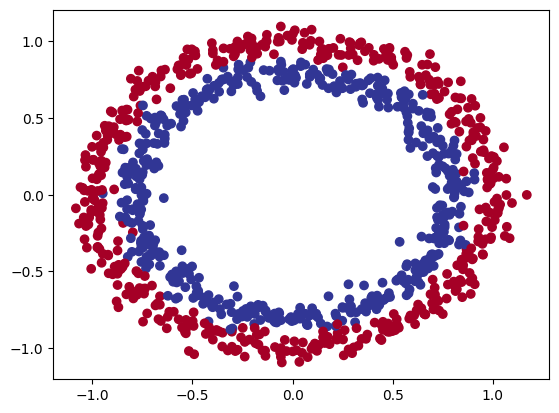

In [6]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
#Create model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#Compile model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#Fit model
history1= model_1.fit(X,y,epochs=50, verbose=0)

In [9]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


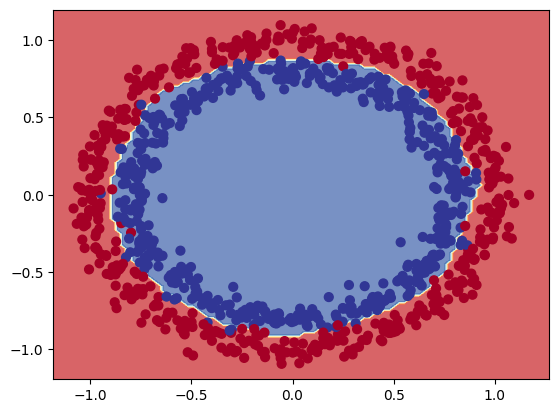

In [10]:
plot_decision_boundary(model_1,X,y)

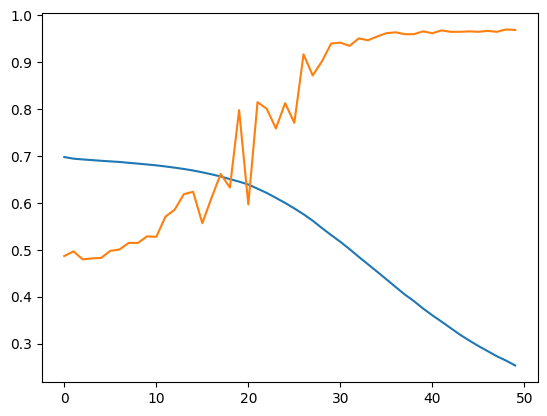

In [11]:


plt.plot(history1.history['loss'])
plt.plot(history1.history['accuracy'])

In [12]:
len(X)

1000

In [13]:
X_train=X[:800]
X_test=X[800:]
y_train=y[:800]
y_test=y[800:]


len(y_train),len(y_test)

(800, 200)

In [14]:
#Create model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#Compile model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#Fit model
history2= model_2.fit(X_train,y_train,epochs=100, verbose=0)

In [15]:
model_2.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1137 - accuracy: 0.9800


[0.11372359097003937, 0.9800000190734863]

In [16]:
y2_hat=model_2.predict(X_test)

y2_hat[:5]

7/7 [==============================] - 0s 3ms/step


array([[0.91577834],
       [0.00711037],
       [0.01014062],
       [0.08351867],
       [0.8242295 ]], dtype=float32)

In [17]:
y_test[:5]

array([1, 0, 0, 0, 1], dtype=int64)

In [18]:
y2_hat_labels = y2_hat.round()
y2_hat_labels = tf.squeeze(y2_hat_labels)
y2_hat_labels[:5]


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 0., 0., 0., 1.], dtype=float32)>

In [19]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y2_hat_labels)

array([[ 88,   2],
       [  2, 108]], dtype=int64)